<a href="https://colab.research.google.com/github/bhanu608/-_-/blob/main/Tak2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2 : UNEMPLOYMENT ANALYSIS WITH PYTHON

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# loading dataset

In [23]:
uploaded = files.upload()

Saving Unemployment in India.csv to Unemployment in India (1).csv


In [24]:
df = pd.read_csv('Unemployment in India.csv')

# Preprocessing the data

In [25]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [26]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# To drop all the rows with the NaN values
df = df.dropna()

In [28]:
# now check with tail function whether nan values are removed or not
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [29]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


# Exploratory analysis and Visualization

<Axes: >

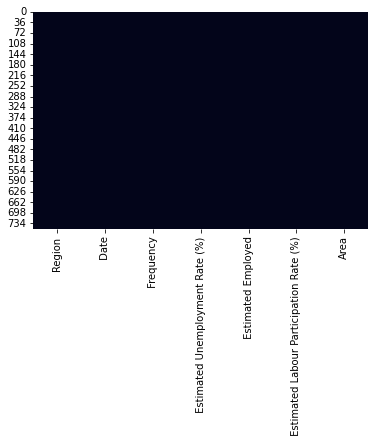

In [31]:
sns.heatmap(df.isnull(), cbar=False)

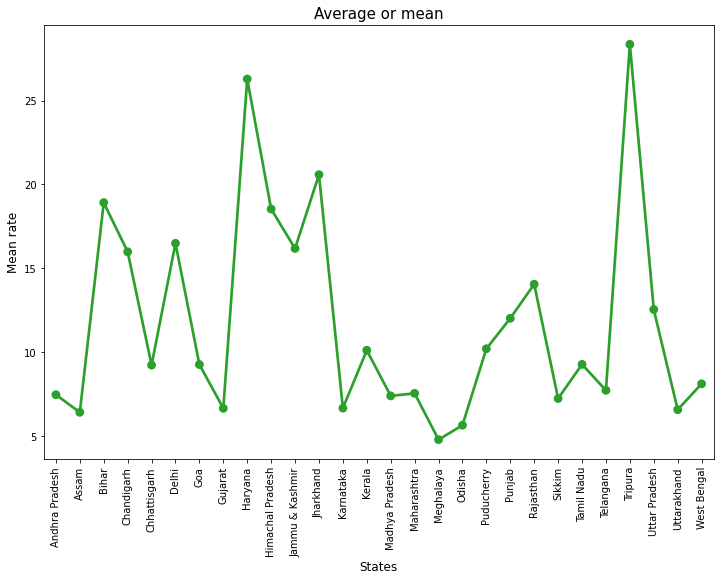

In [32]:
# mean rate for states during lockdown
grouped_df = df.groupby(["Region"])[" Estimated Unemployment Rate (%)"].aggregate("mean").reset_index()
plt.figure(figsize=(12, 8))
color = sns.color_palette()
sns.pointplot(x=grouped_df['Region'].values, y=grouped_df[" Estimated Unemployment Rate (%)"].values, color=color[2])
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Average or mean", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

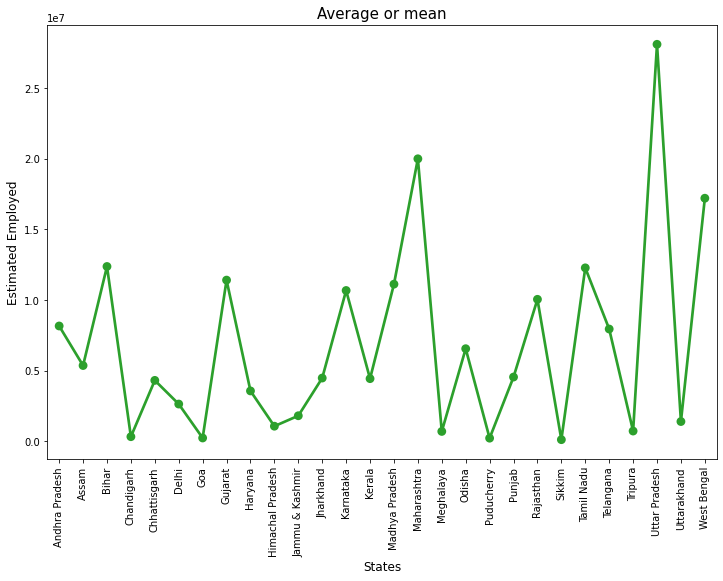

In [33]:
# mean rate for states during lockdown
grouped_df = df.groupby(["Region"])[" Estimated Employed"].aggregate("mean").reset_index()
plt.figure(figsize=(12, 8))
color = sns.color_palette()
sns.pointplot(x=grouped_df['Region'].values, y=grouped_df[" Estimated Employed"].values, color=color[2])
plt.ylabel('Estimated Employed', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Average or mean", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

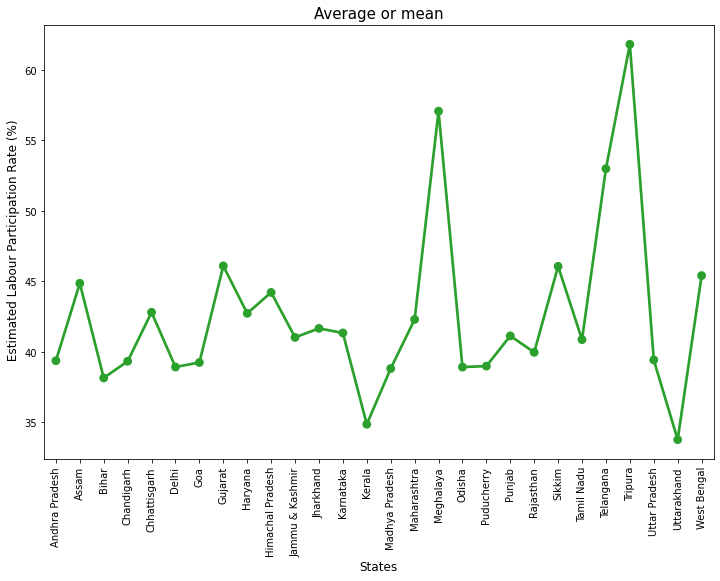

In [34]:
# mean rate for states during lockdown
grouped_df = df.groupby(["Region"])[" Estimated Labour Participation Rate (%)"].aggregate("mean").reset_index()
plt.figure(figsize=(12, 8))
color = sns.color_palette()
sns.pointplot(x=grouped_df['Region'].values, y=grouped_df[" Estimated Labour Participation Rate (%)"].values, color=color[2])
plt.ylabel(' Estimated Labour Participation Rate (%)', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Average or mean", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [35]:
# regions that are present in the given dataset
df.Region.nunique()

28

In [36]:
# exact mean rates
make_total = df.pivot_table(" Estimated Unemployment Rate (%)",index=['Region'],aggfunc='mean')
topstate=make_total.sort_values(by=' Estimated Unemployment Rate (%)',ascending=False)[:28]
print(topstate)

                   Estimated Unemployment Rate (%)
Region                                            
Tripura                                  28.350357
Haryana                                  26.283214
Jharkhand                                20.585000
Bihar                                    18.918214
Himachal Pradesh                         18.540357
Delhi                                    16.495357
Jammu & Kashmir                          16.188571
Chandigarh                               15.991667
Rajasthan                                14.058214
Uttar Pradesh                            12.551429
Punjab                                   12.031071
Puducherry                               10.215000
Kerala                                   10.123929
Tamil Nadu                                9.284286
Goa                                       9.274167
Chhattisgarh                              9.240357
West Bengal                               8.124643
Telangana                      

# Summary

# 1. Which area (Rural/Urban) got more unemployment rate?

In [37]:
grouped_df = df.groupby(["Area"])[" Estimated Unemployment Rate (%)"].aggregate("mean").reset_index()
grouped_df

,Area,Estimated Unemployment Rate (%)
0,Rural,10.324791
1,Urban,13.166614


## => Urban areas got more unemployment rate during pandamic.

# 2. which month effected more during corona ?

In [38]:
grouped_df = df.groupby([" Date"])[" Estimated Unemployment Rate (%)"].aggregate("mean").reset_index()
grouped_df

,Date,Estimated Unemployment Rate (%)
0,29-02-2020,9.964717
1,30-04-2020,23.641569
2,30-06-2019,9.303333
3,30-06-2020,11.903600
4,30-09-2019,9.051731
5,30-11-2019,9.868364
6,31-01-2020,9.950755
7,31-03-2020,10.700577
8,31-05-2019,8.874259
9,31-05-2020,24.875294


## According to the above results the months April and May are effected more by pandamic.

# 3. which state effected more ?

## From the above graphs we can say that Tripura is effected more by pandamic

# 4. which state resisted more ?

## => From the above graphs we can say that Meghalaya has less than 5% unemployment rate which is quite common